# [MN 0036535878] Explanatory data analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

## Dimensionality of The Dataset

In [3]:
print(f"Number of train samples: {train_df.shape[0]}")
print(f"Number of test samples: {test_df.shape[0]}")

print(f"Number of train features: {train_df.shape[1]}")
print(f"Number of test features: {test_df.shape[1]}")

unique_symbols = train_df['Symbol'].unique() + test_df['Symbol'].unique()
print(f"Number of unique stocks: {len(unique_symbols)}")


Number of train samples: 501400
Number of test samples: 209600
Number of train features: 10
Number of test features: 9
Number of unique stocks: 200


## Missing Values

### Train Dataset

In [4]:
def print_missing_data(df):
    print(df.isnull().sum())

print_missing_data(train_df)

missing_data_train_df = train_df[train_df.isnull().any(axis=1)]
print(f"Symbols with invalid values in train dataset: {missing_data_train_df['Symbol'].unique()}")

Date             0
Symbol           0
Adj Close    27229
Close        27229
High         27229
Low          27229
Open         27229
Volume       27245
Target           0
Id               0
dtype: int64
Symbols with invalid values in train dataset: ['MMM' 'ALLE' 'ANET' 'CBOE' 'CHTR' 'CFG' 'CTVA' 'FANG' 'ENPH' 'FLT' 'FTV'
 'FOXA' 'GEHC' 'GNRC' 'GM' 'HLT' 'INVH' 'IQV' 'KVUE' 'KEYS' 'KMI' 'LYB'
 'MPC' 'PSX' 'SYF' 'TRGP' 'VLTO' 'ZTS']


### Test Dataset

In [5]:
print_missing_data(test_df)

missing_data_test_df = test_df[test_df.isnull().any(axis=1)]
print(f"Symbols with invalid values in test dataset: {missing_data_test_df['Symbol'].unique()}")

Date            0
Symbol          0
Adj Close    2530
Close        2530
High         2530
Low          2530
Open         2530
Volume       2530
Id              0
dtype: int64
Symbols with invalid values in test dataset: ['GEHC' 'KVUE' 'VLTO']


Since some classifiers can't work with invalid values, we will fill them with 0.

In [6]:
test_df.fillna(0, inplace=True)

### Indivitual Symbol Analysis

In order to identify and address any data issues or anomalies, we will conduct a detailed analysis for each symbol with invalid values manually.

#### $MMM$

In [7]:
missing_data_mmm_df = missing_data_train_df[missing_data_train_df['Symbol'] == 'MMM']
missing_data_mmm_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
500,2011-12-27,MMM,55.581924,82.279999,82.639999,81.620003,81.910004,NaN,1,500
501,2011-12-28,MMM,54.818573,81.150002,82.440002,80.940002,82.220001,NaN,1,501
502,2011-12-29,MMM,55.467079,82.110001,82.199997,81.190002,81.370003,NaN,1,502
503,2011-12-30,MMM,55.210377,81.730003,82.449997,81.599998,82.230003,NaN,1,503
504,2012-01-03,MMM,56.399281,83.489998,84.440002,83.360001,83.760002,NaN,1,504
505,2012-01-04,MMM,56.865433,84.180000,84.260002,83.110001,83.129997,NaN,1,505
506,2012-01-05,MMM,56.608723,83.800003,83.870003,82.699997,83.529999,NaN,1,506
507,2012-01-06,MMM,56.318230,83.370003,84.239998,83.320000,83.779999,NaN,1,507
508,2012-01-09,MMM,56.655991,83.870003,84.059998,83.260002,83.580002,NaN,1,508
509,2012-01-10,MMM,56.946457,84.300003,85.190002,84.040001,84.589996,NaN,1,509


To address the issue with missing volume values, we will use interpolation techniques to estimate the missing values

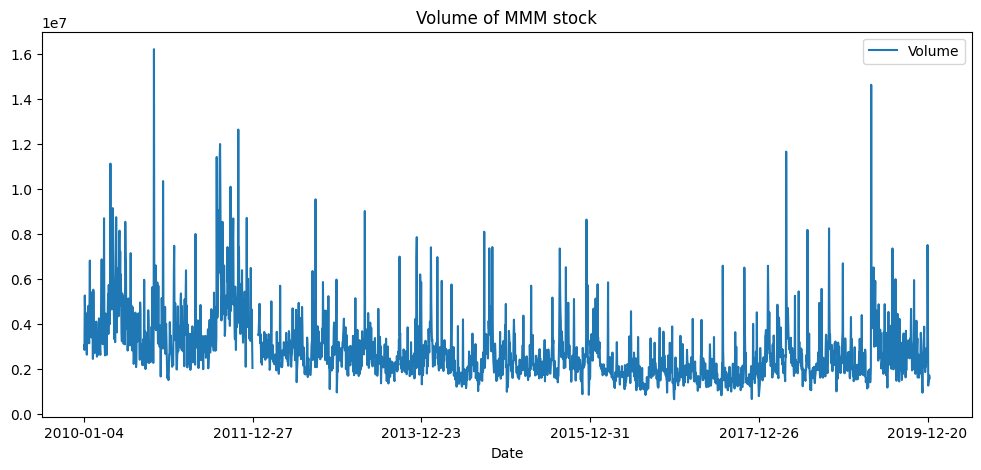

In [8]:
mmm_df = train_df[train_df['Symbol'] == 'MMM']

mmm_df.plot(x='Date', y='Volume', kind='line', figsize=(12, 5))
plt.title('Volume of MMM stock')
plt.show()

First date: 2011-12-27
Last date: 2012-01-19
First date: 2011-12-07
Last date: 2012-02-08


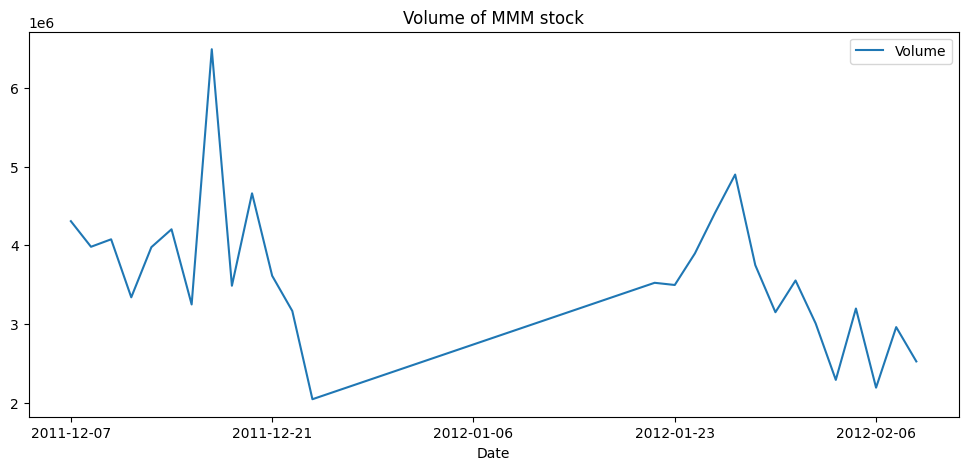

In [9]:
first_date = missing_data_mmm_df['Date'].min()
last_date = missing_data_mmm_df['Date'].max()

print(f"First date: {first_date}")
print(f"Last date: {last_date}")

first_date_delta = pd.to_datetime(first_date) - pd.Timedelta(days=20)
last_date_delta = pd.to_datetime(last_date) + pd.Timedelta(days=20)

first_date_delta = first_date_delta.strftime('%Y-%m-%d')
last_date_delta = last_date_delta.strftime('%Y-%m-%d')

print(f"First date: {first_date_delta}")
print(f"Last date: {last_date_delta}")

mmm_df.loc[:, 'Volume'] = mmm_df['Volume'].interpolate(method='linear')

filtered_mmm_df = mmm_df[(mmm_df['Date'] >= first_date_delta) & (mmm_df['Date'] <= last_date_delta)]
filtered_mmm_df.plot(x='Date', y='Volume', kind='line', figsize=(12, 5))
plt.title('Volume of MMM stock')
plt.show()

In [10]:
train_df.loc[filtered_mmm_df.index, 'Volume'] = filtered_mmm_df['Volume']

missing_data_mmm_df = train_df[train_df['Symbol'] == 'MMM']
if print_missing_data(missing_data_mmm_df) is None:
    missing_data_train_df = missing_data_train_df[missing_data_train_df['Symbol'] != 'MMM']

print_missing_data(train_df)

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Target       0
Id           0
dtype: int64
Date             0
Symbol           0
Adj Close    27229
Close        27229
High         27229
Low          27229
Open         27229
Volume       27229
Target           0
Id               0
dtype: int64


We handled missing volume values for symbol $MMM$. From the table before, we can conclude that there are now 27229 missing values for each feature. We are lucky, because we now know there is equal number of invalid values across all features.

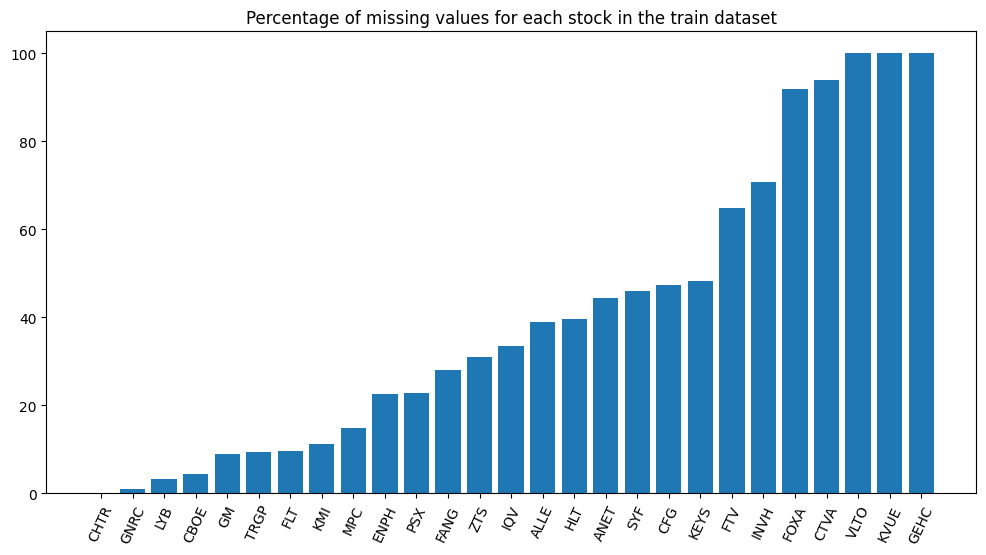

In [11]:
missing_df = missing_data_train_df.groupby('Symbol').size().reset_index(name='MissingCount')

missing_df['MissingCount'] = (missing_df['MissingCount']) * 100
full_df = train_df.groupby('Symbol').size().reset_index(name='FullCount')

missing_df['MissingCount'] = missing_df['MissingCount'] / full_df['FullCount']

sorted_df = missing_df.sort_values(by='MissingCount')

plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Symbol'], sorted_df['MissingCount'])
plt.xticks(rotation=65)
plt.title('Percentage of missing values for each stock in the train dataset')
plt.show()

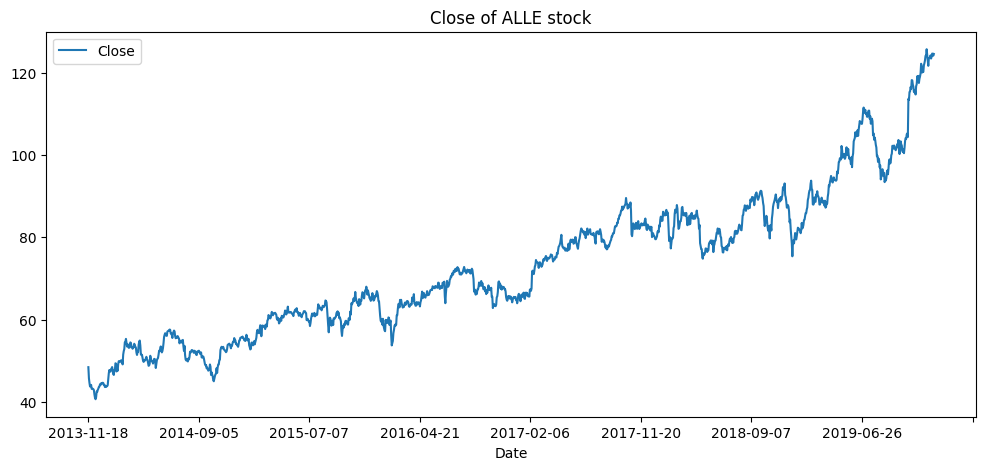

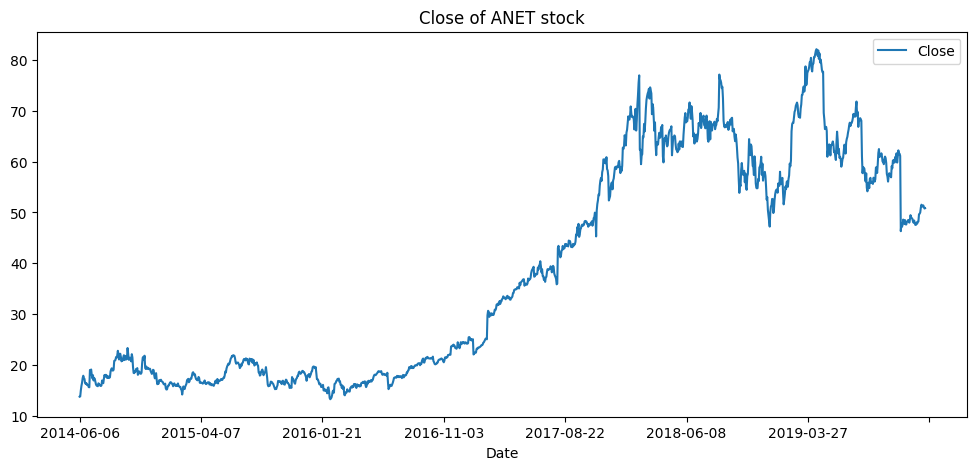

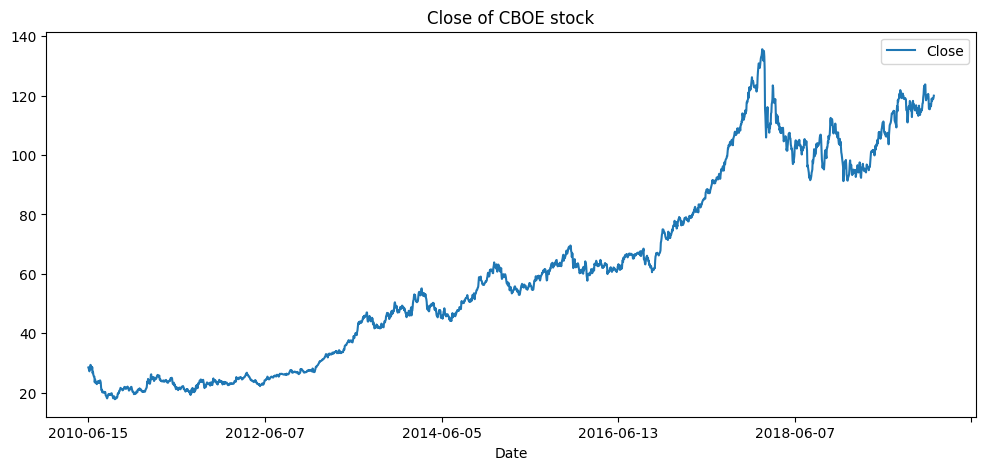

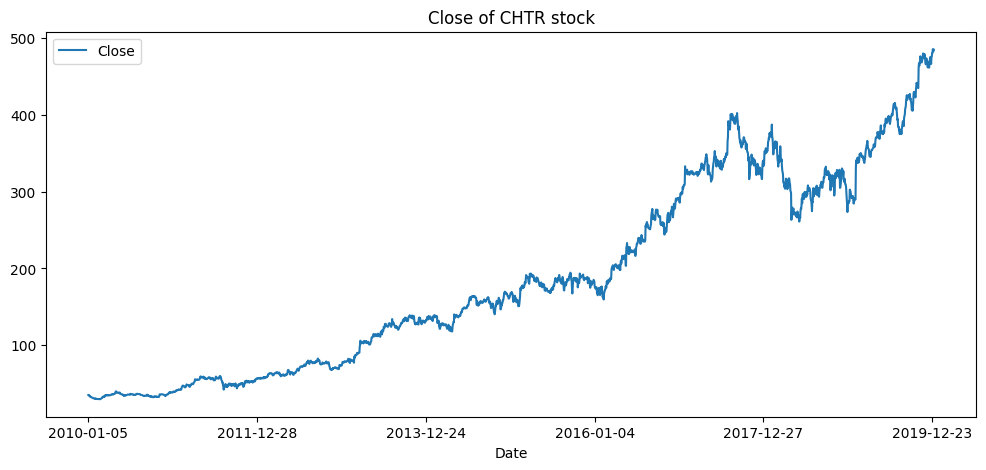

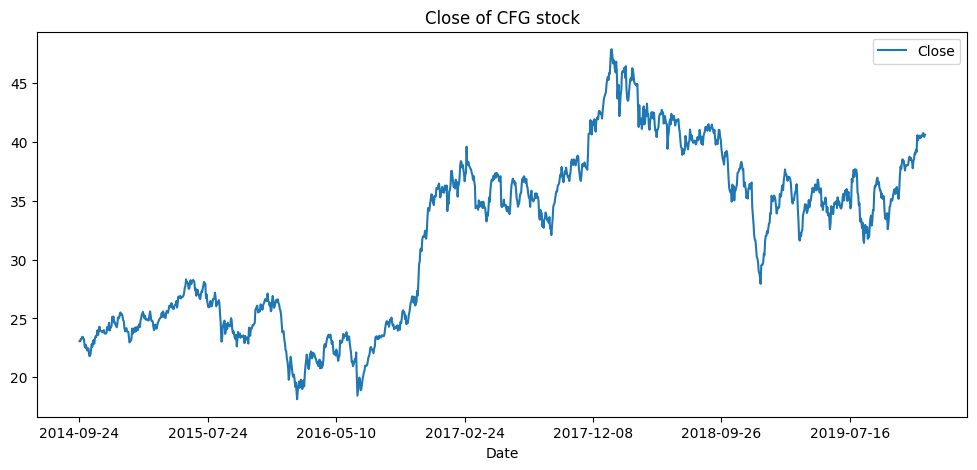

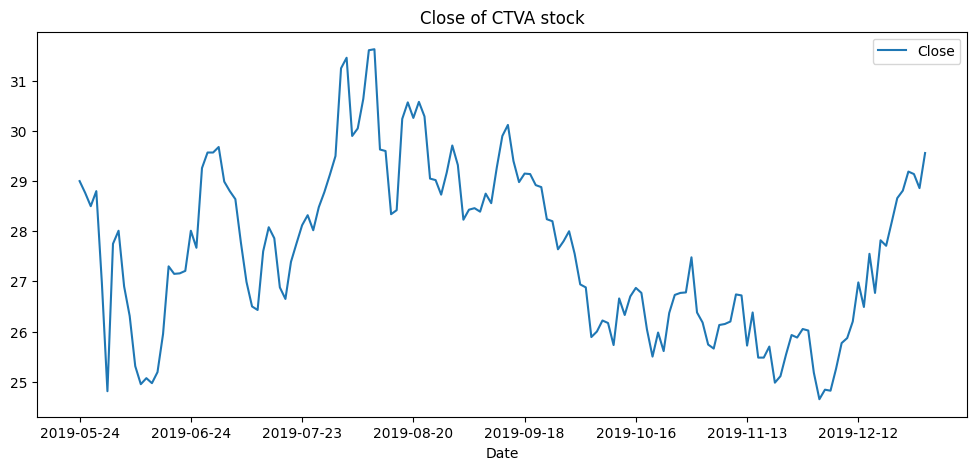

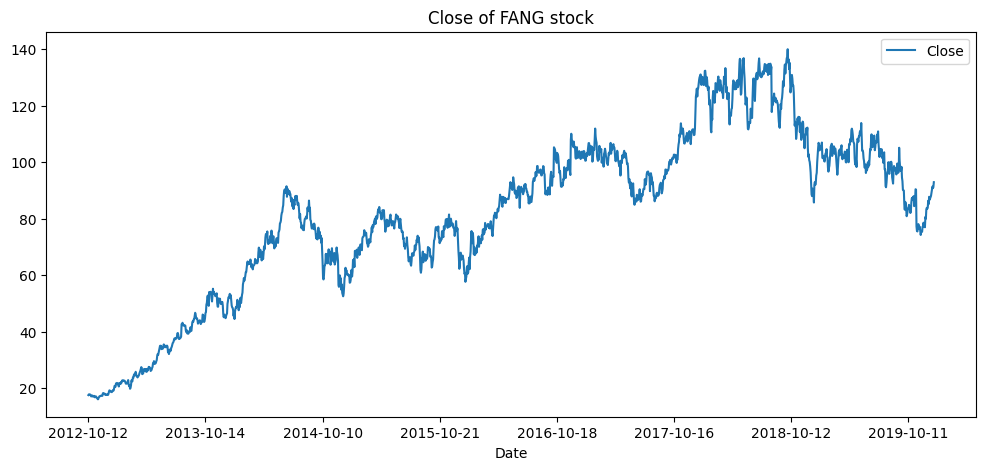

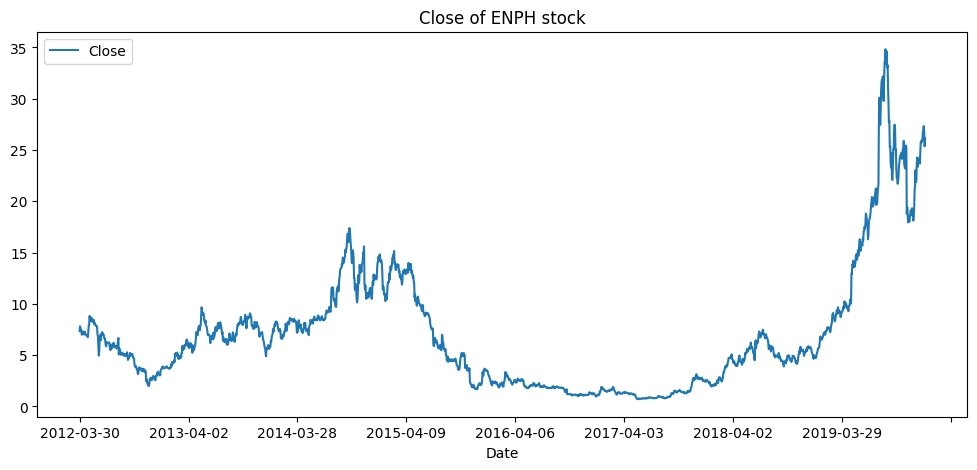

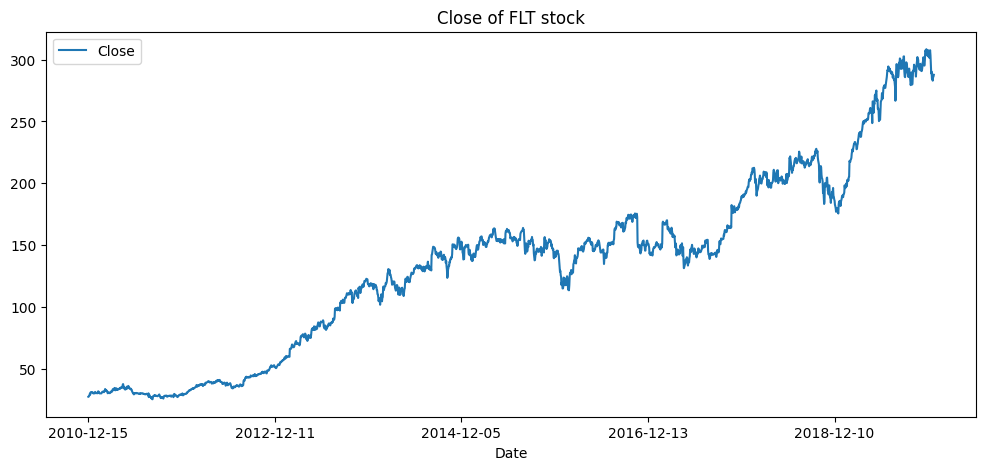

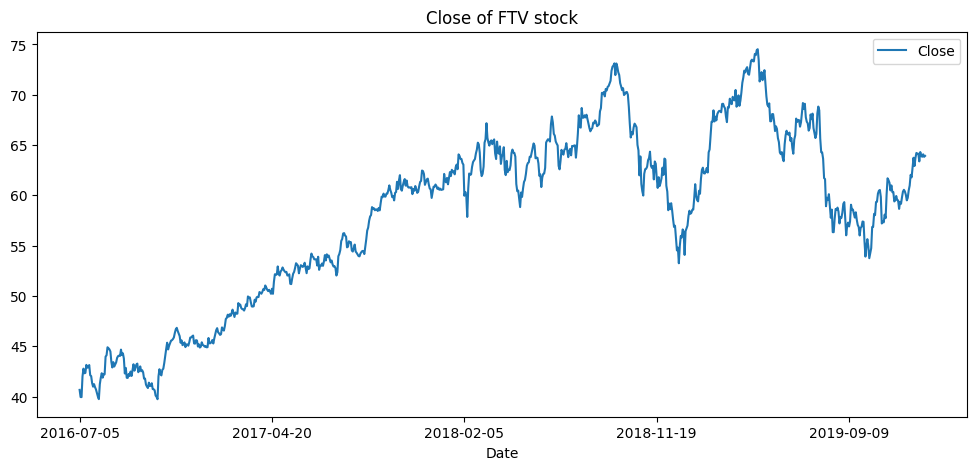

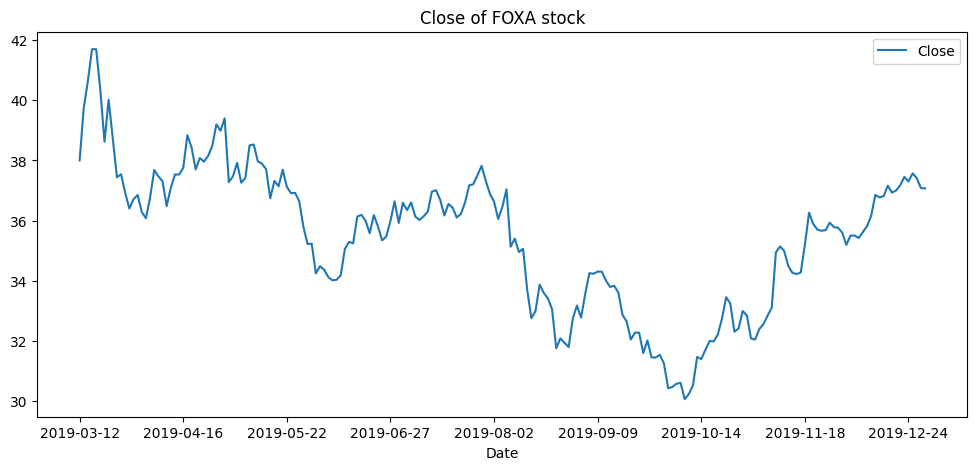

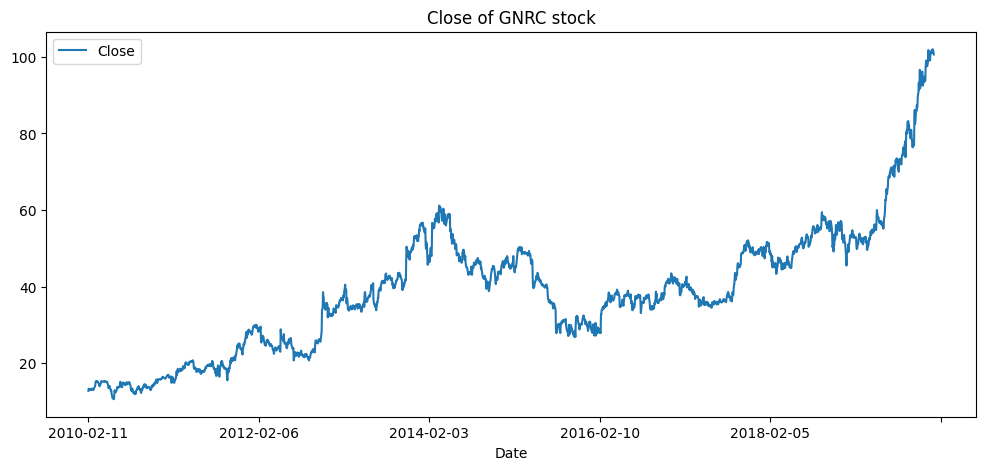

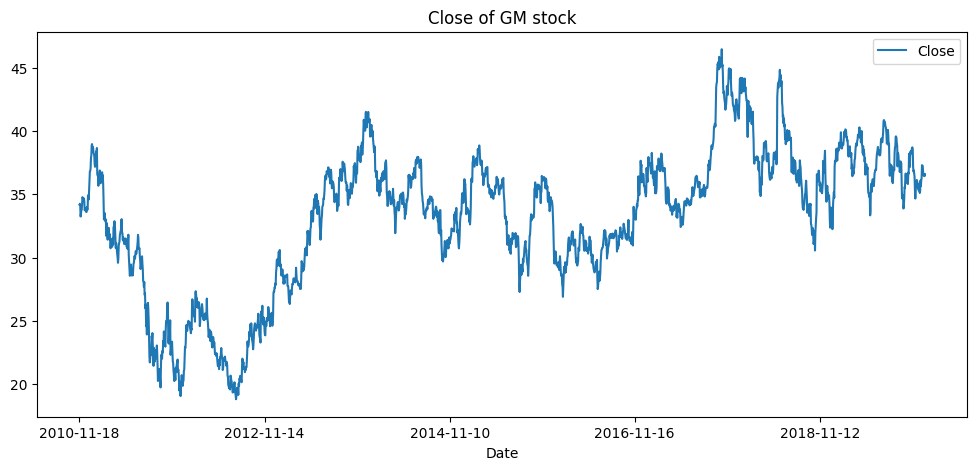

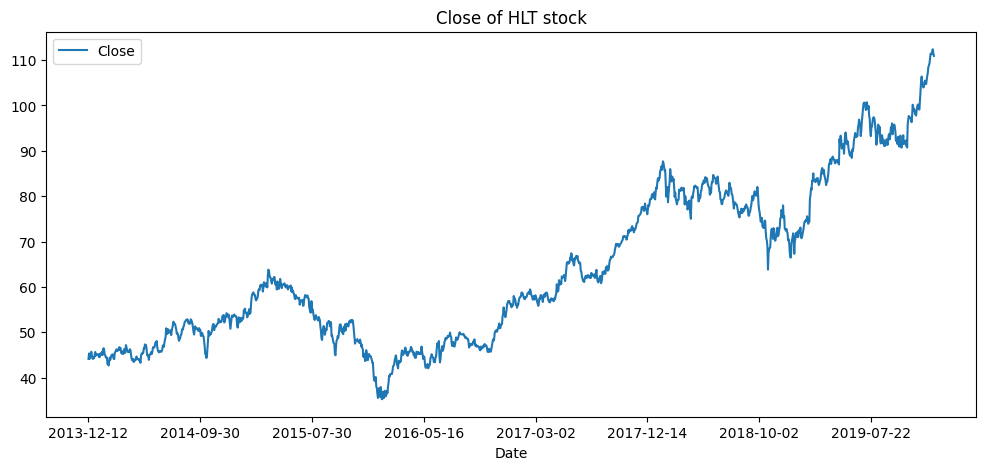

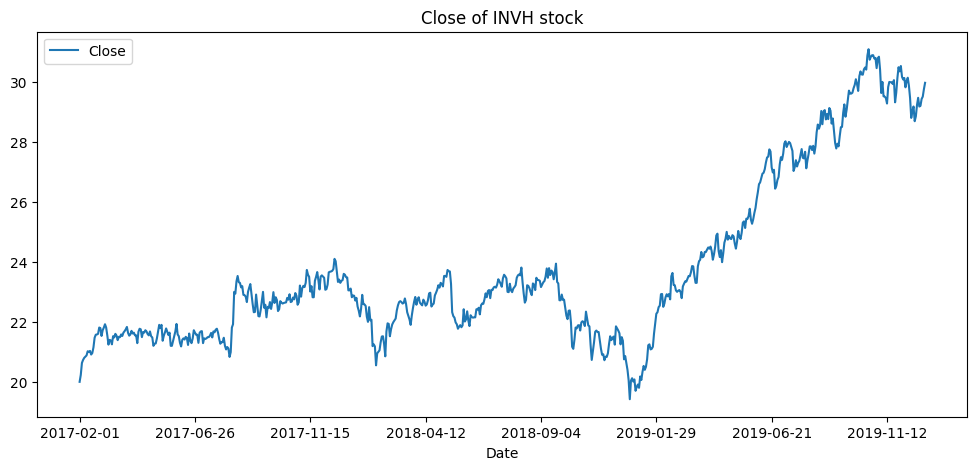

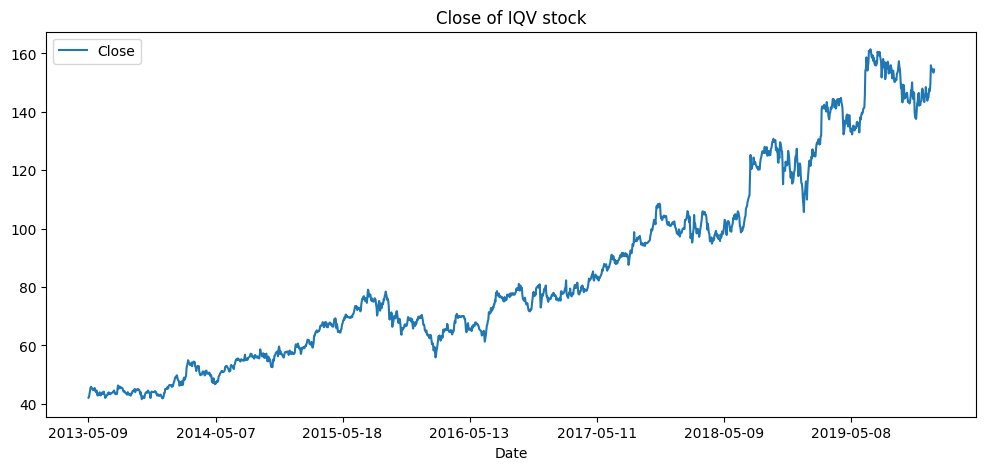

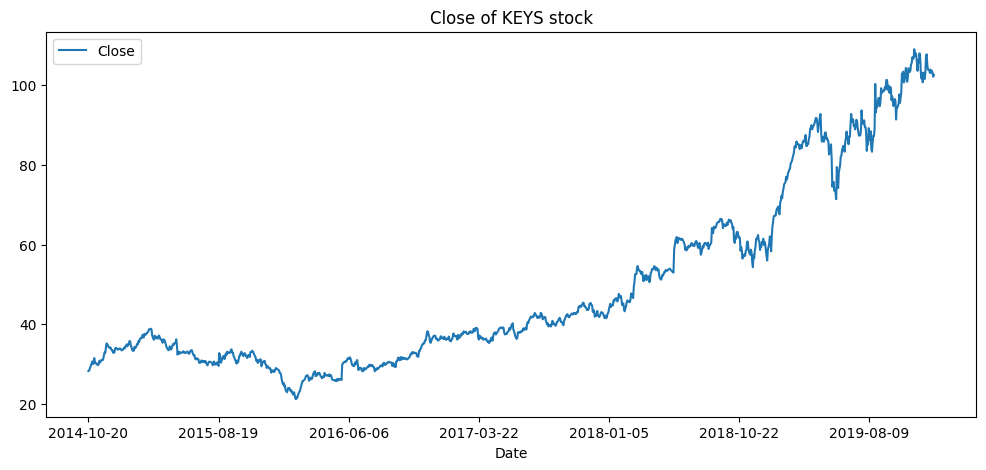

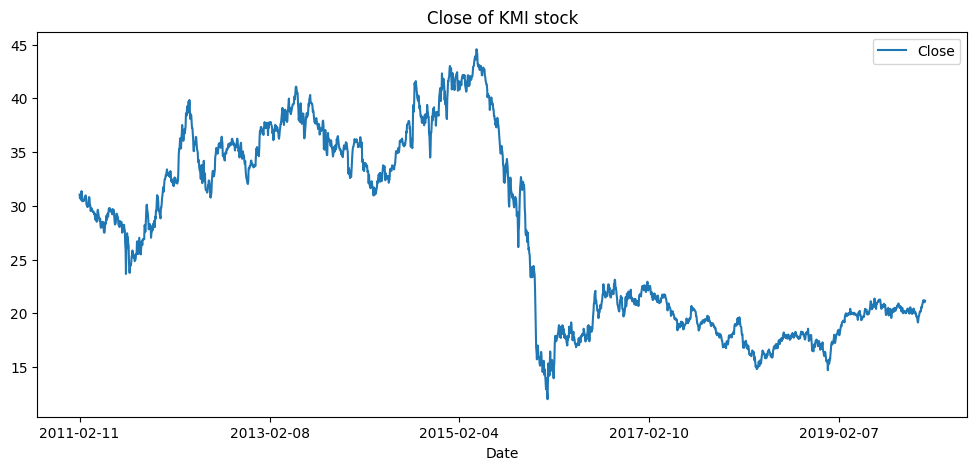

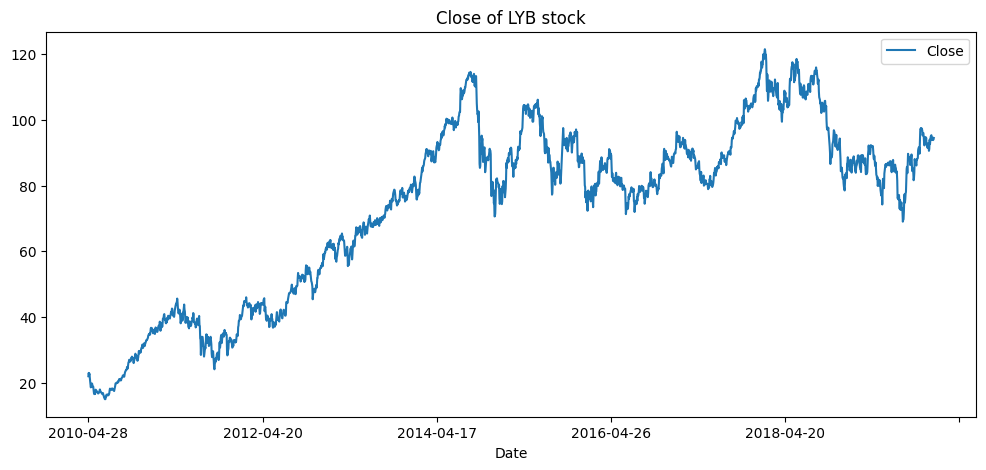

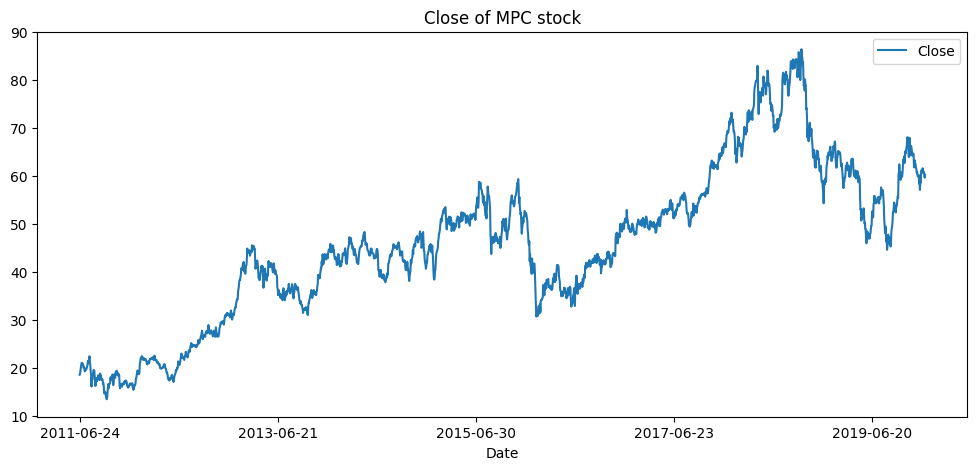

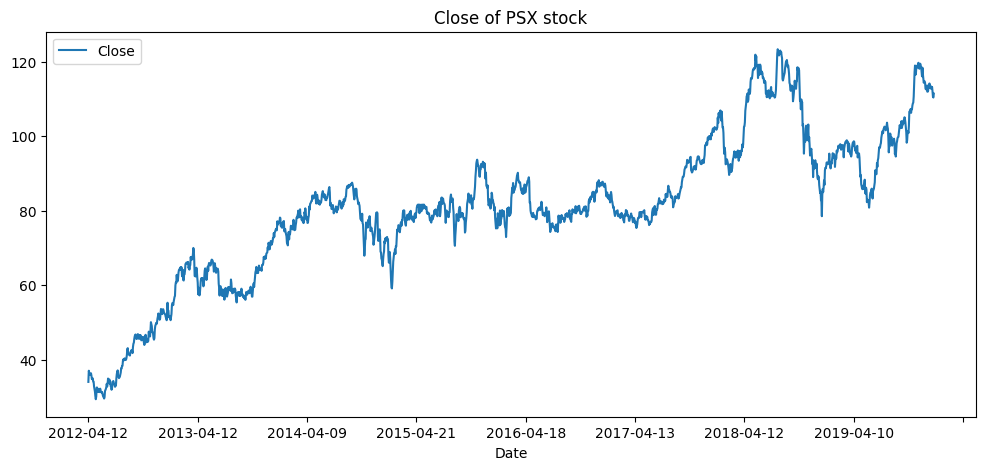

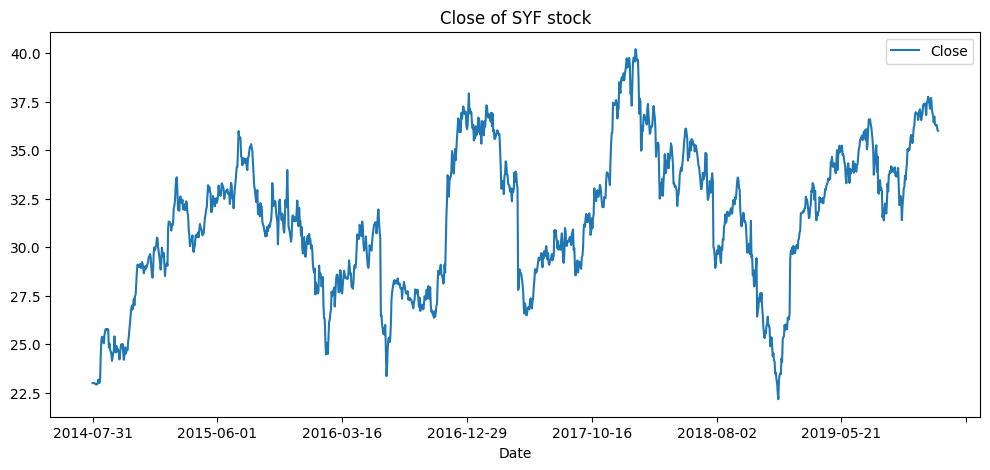

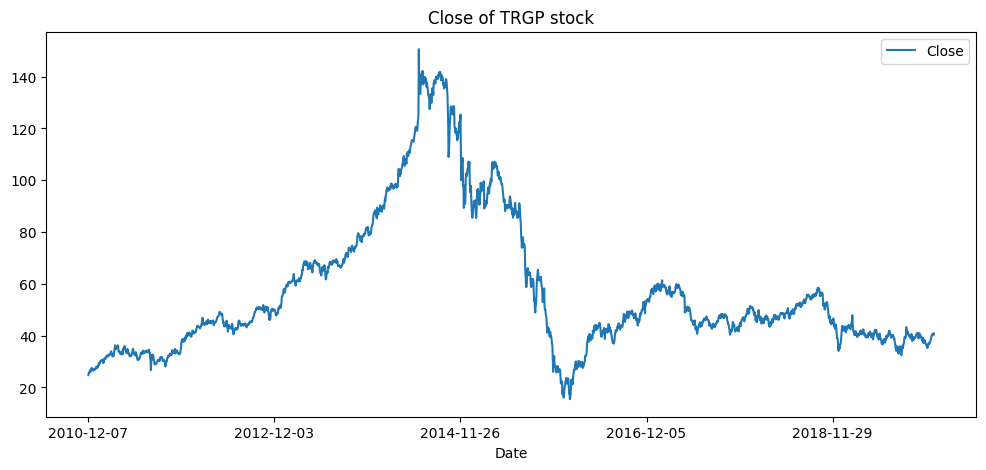

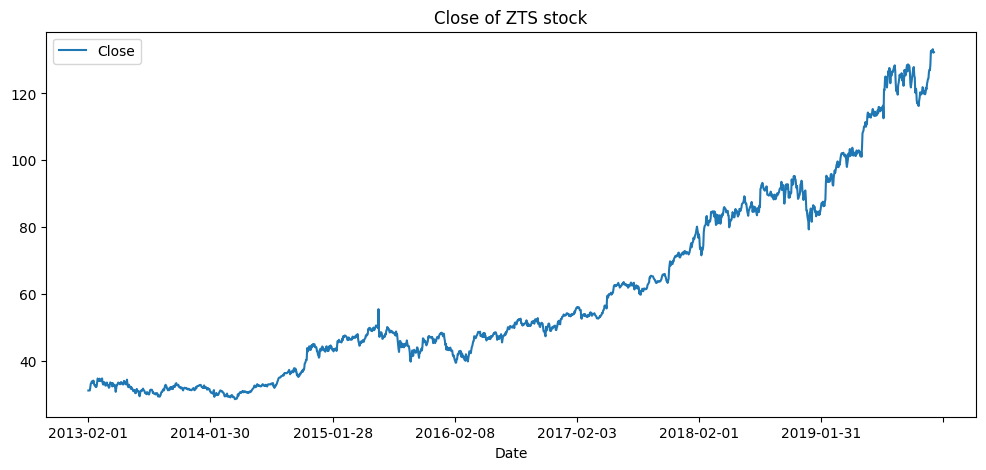

In [12]:
copy_df = train_df.copy()
copy_df = copy_df[copy_df['Symbol'].isin(missing_data_train_df['Symbol'].unique())]
copy_df = copy_df.dropna()

start_dates = copy_df.groupby('Symbol')['Date'].min()
end_dates = copy_df.groupby('Symbol')['Date'].max()

for symbol in copy_df['Symbol'].unique():
    symbol_df = copy_df[copy_df['Symbol'] == symbol]
    symbol_df.plot(x='Date', y='Close', kind='line', figsize=(12, 5))
    plt.title(f'Close of {symbol} stock')
    plt.show()

In [13]:
train_df = train_df.dropna()

From the plots above, we can see that the dates missing are at the "start" of the dataset. Simply removing nan values will be benifitial for the model.

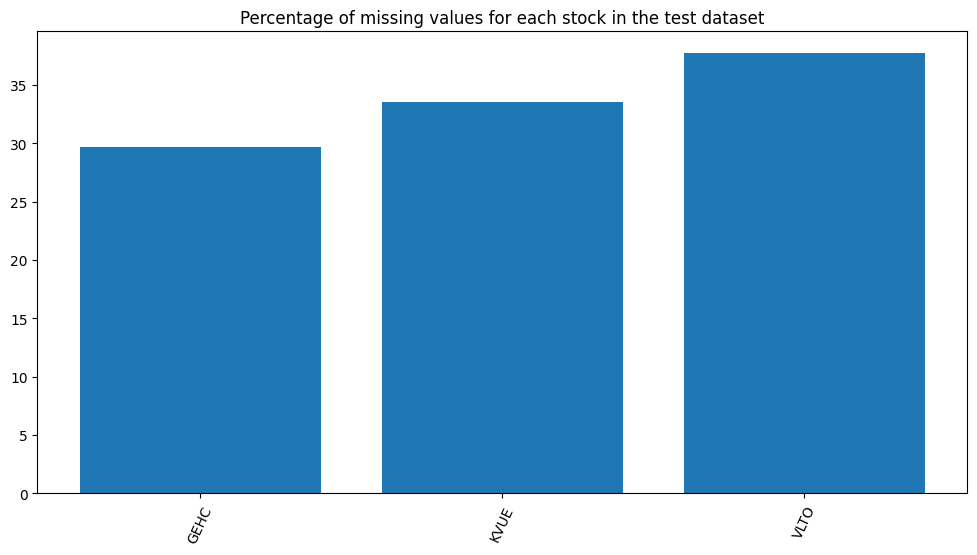

In [14]:
missing_df = missing_data_test_df.groupby('Symbol').size().reset_index(name='MissingCount')

missing_df['MissingCount'] = (missing_df['MissingCount']) * 100
full_df = train_df.groupby('Symbol').size().reset_index(name='FullCount')

missing_df['MissingCount'] = missing_df['MissingCount'] / full_df['FullCount']

sorted_df = missing_df.sort_values(by='MissingCount')

plt.figure(figsize=(12, 6))
plt.bar(sorted_df['Symbol'], sorted_df['MissingCount'])
plt.xticks(rotation=65)
plt.title('Percentage of missing values for each stock in the test dataset')
plt.show()

## Duplicates

In [15]:
duplicate_rows_train = train_df[train_df.duplicated()]
print(f"Number of duplicate rows in a train dataset: {duplicate_rows_train.shape[0]}")

duplicate_rows_test = test_df[test_df.duplicated()]
print(f"Number of duplicate rows in a test dataset: {duplicate_rows_test.shape[0]}")

Number of duplicate rows in a train dataset: 0
Number of duplicate rows in a test dataset: 0


There are no any duplicates in the dataset.

## Data Validation

### Negative Values

In [16]:
negative_values_train = train_df[(train_df['Adj Close'] < 0) | (train_df['Close'] < 0) | (train_df['High'] < 0) | (train_df['Low'] < 0) | (train_df['Open'] < 0) | (train_df['Volume'] < 0)]
print(f"Number of negative values in a train dataset: {negative_values_train.shape[0]}")

first_date = negative_values_train['Date'].min()
last_date = negative_values_train['Date'].max()

negative_values_train

Number of negative values in a train dataset: 110


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
60596,2011-09-14,BALL,17.094999,17.094999,-51.885000,16.750000,17.125000,2850400.0,1,60596
60597,2011-09-15,BALL,17.115000,17.115000,-51.750000,17.020000,17.240000,3416400.0,1,60597
60598,2011-09-16,BALL,17.155001,17.155001,-51.764997,16.985001,17.165001,3888200.0,1,60598
60599,2011-09-19,BALL,16.855000,16.855000,-50.774998,16.565001,16.885000,2524400.0,1,60599
60600,2011-09-20,BALL,16.754999,16.754999,-51.270000,16.705000,16.879999,2251000.0,1,60600
...,...,...,...,...,...,...,...,...,...,...
60701,2012-02-14,BALL,19.934999,19.934999,-59.909998,19.805000,19.915001,1077600.0,1,60701
60702,2012-02-15,BALL,19.865000,19.865000,-60.105000,19.820000,19.959999,1644200.0,1,60702
60703,2012-02-16,BALL,20.160000,20.160000,-60.584999,19.780001,19.885000,1473200.0,1,60703
60704,2012-02-17,BALL,20.055000,20.055000,-60.750000,20.000000,20.250000,1387600.0,1,60704


The issue lies in $BALL$ stock. Clearly, the "High" feature is a data error. Since "High" feature won't be of much use when predicting whether to buy the stock or not, we will replace the negative values with $max$("Open","Close")

In [17]:
train_df.loc[train_df['Symbol'] == 'BALL', 'High'] = train_df.loc[train_df['Symbol'] == 'BALL', ['Open', 'Close']].max(axis=1)

train_df[(train_df['Symbol'] == 'BALL') & (train_df['Date'] >= first_date) & (train_df['Date'] <= last_date)]


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
60596,2011-09-14,BALL,17.094999,17.094999,17.125000,16.750000,17.125000,2850400.0,1,60596
60597,2011-09-15,BALL,17.115000,17.115000,17.240000,17.020000,17.240000,3416400.0,1,60597
60598,2011-09-16,BALL,17.155001,17.155001,17.165001,16.985001,17.165001,3888200.0,1,60598
60599,2011-09-19,BALL,16.855000,16.855000,16.885000,16.565001,16.885000,2524400.0,1,60599
60600,2011-09-20,BALL,16.754999,16.754999,16.879999,16.705000,16.879999,2251000.0,1,60600
...,...,...,...,...,...,...,...,...,...,...
60701,2012-02-14,BALL,19.934999,19.934999,19.934999,19.805000,19.915001,1077600.0,1,60701
60702,2012-02-15,BALL,19.865000,19.865000,19.959999,19.820000,19.959999,1644200.0,1,60702
60703,2012-02-16,BALL,20.160000,20.160000,20.160000,19.780001,19.885000,1473200.0,1,60703
60704,2012-02-17,BALL,20.055000,20.055000,20.250000,20.000000,20.250000,1387600.0,1,60704


We will do the same for test set.

In [18]:
negative_values_test = test_df[(test_df['Adj Close'] < 0) | (test_df['Close'] < 0) | (test_df['High'] < 0) | (test_df['Low'] < 0) | (test_df['Open'] < 0) | (test_df['Volume'] < 0)]
print(f"Number of negative values in a test dataset: {negative_values_test.shape[0]}")

Number of negative values in a test dataset: 0


### Data Integrity

In [19]:
high_low_train = train_df[train_df['High'] < train_df['Low']]
print(f"Number of examples where 'High' is less than 'Low' in a train dataset: {high_low_train.shape[0]}")


Number of examples where 'High' is less than 'Low' in a train dataset: 0


## Features Distribution

#### Train set

['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Target', 'Id']

The training data covers the following time range:
Start date: 2010-01-04 00:00:00
End date: 2019-12-31 00:00:00
The test data covers the following time range:
Start date: 2020-01-02
End date: 2024-03-01

Number of unique symbols in train dataset: 197


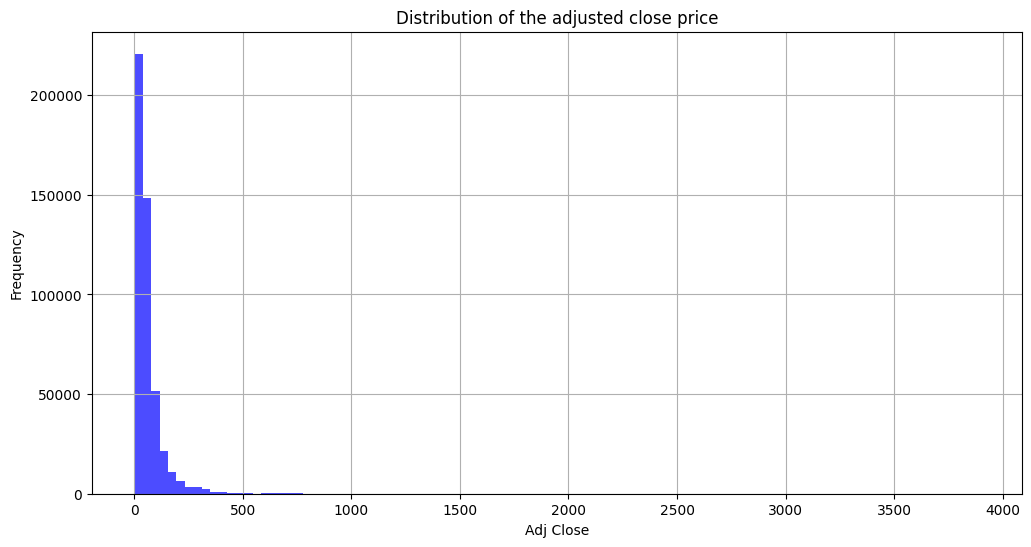

Mean of Adj Close: 68.55779880226886
Median of Adj Close: 42.509498596191406
Standard deviation of Adj Close: 145.55511948576088
Minimum value of Adj Close: 0.699999988079071
Maximum value of Adj Close: 3892.889892578125



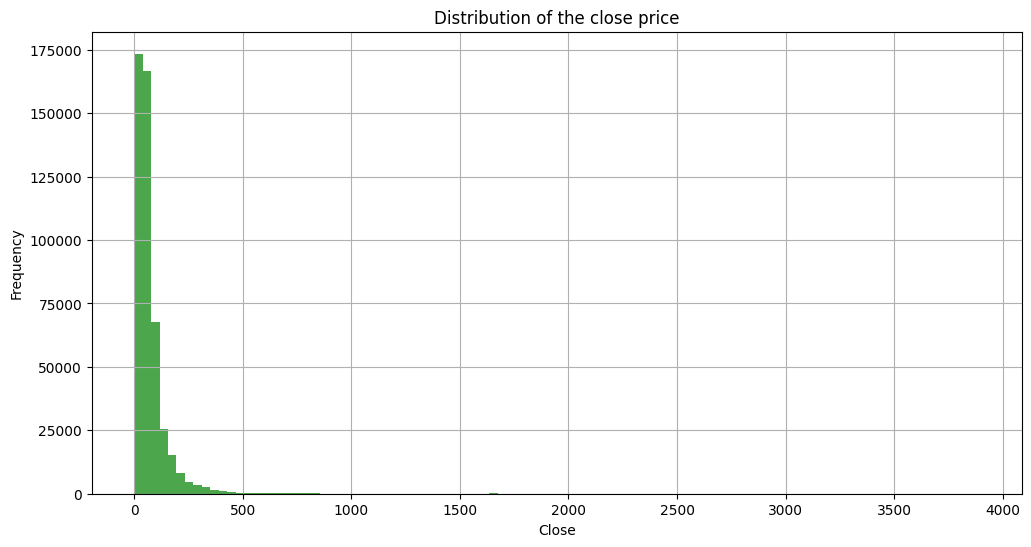

Mean of Close: 78.06377544553249
Median of Close: 51.540000915527344
Standard deviation of Close: 146.68483716390367
Minimum value of Close: 0.699999988079071
Maximum value of Close: 3892.889892578125



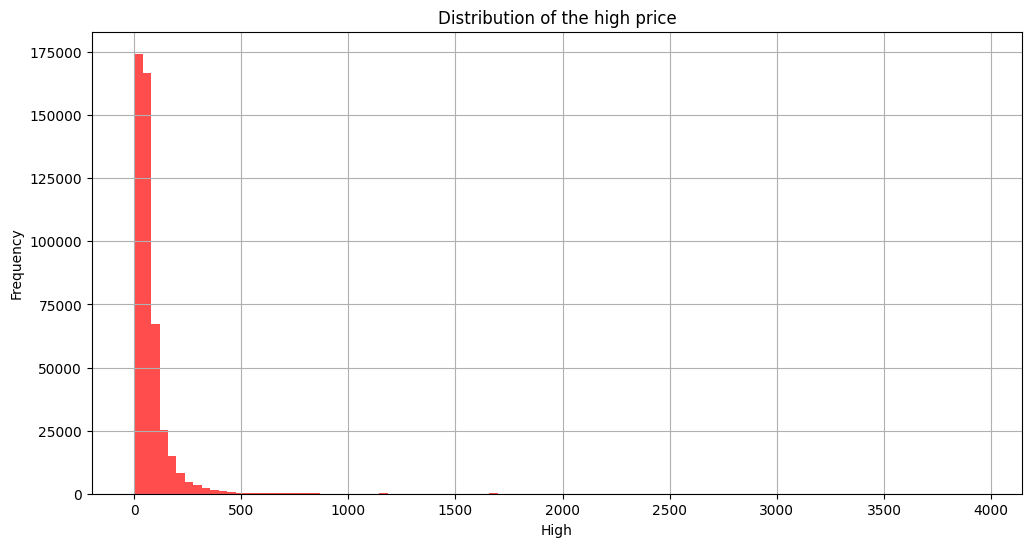

Mean of High: 78.80921669804621
Median of High: 52.04999923706055
Standard deviation of High: 148.32691683820715
Minimum value of High: 0.7099999785423279
Maximum value of High: 3946.5



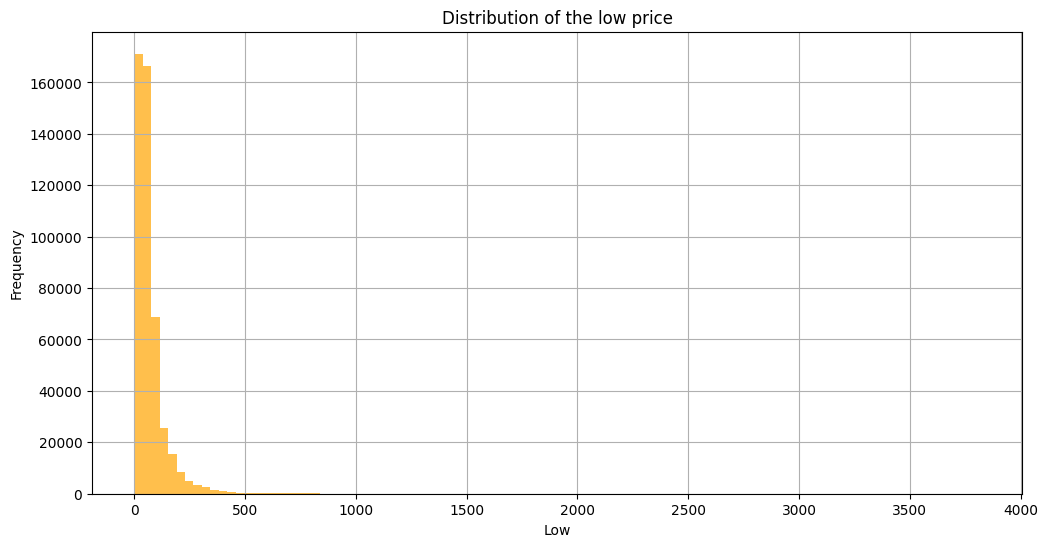

Mean of Low: 77.25728373165254
Median of Low: 51.0099983215332
Standard deviation of Low: 144.89809071840008
Minimum value of Low: 0.6499999761581421
Maximum value of Low: 3815.5



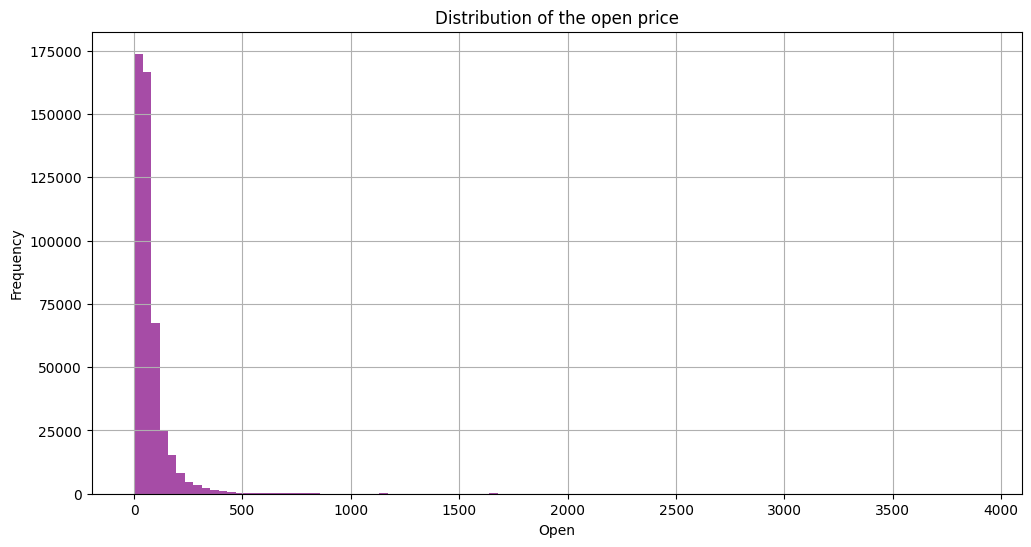

Mean of Open: 78.03879060271825
Median of Open: 51.52999877929688
Standard deviation of Open: 146.57531404161296
Minimum value of Open: 0.699999988079071
Maximum value of Open: 3900.0



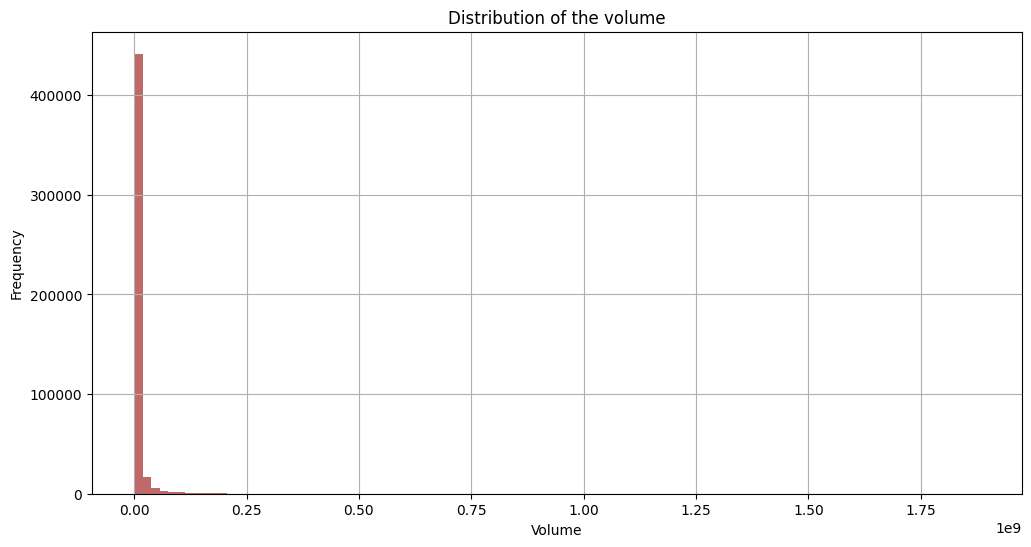

Mean of Volume: 7792912.815667765
Median of Volume: 2179400.0
Standard deviation of Volume: 32033581.72071989
Minimum value of Volume: 0.0
Maximum value of Volume: 1880998000.0



In [20]:
print(f"{list(train_df.columns)}\n")

train_df['Date'] = pd.to_datetime(train_df['Date'])

print("The training data covers the following time range:")
print(f"Start date: {train_df['Date'].min()}")
print(f"End date: {train_df['Date'].max()}")

print("The test data covers the following time range:")
print(f"Start date: {test_df['Date'].min()}")
print(f"End date: {test_df['Date'].max()}\n")

print(f"Number of unique symbols in train dataset: {train_df['Symbol'].nunique()}")

def plot_distribution(df, column, title, color):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.hist(df[column], bins=100, color=color, alpha=0.7)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print(f"Mean of {column}: {df[column].mean()}")
    print(f"Median of {column}: {df[column].median()}")
    print(f"Standard deviation of {column}: {df[column].std()}")
    print(f"Minimum value of {column}: {df[column].min()}")
    print(f"Maximum value of {column}: {df[column].max()}\n")

plot_distribution(train_df, 'Adj Close', 'Distribution of the adjusted close price', 'blue')
plot_distribution(train_df, 'Close', 'Distribution of the close price', 'green')
plot_distribution(train_df, 'High', 'Distribution of the high price', 'red')
plot_distribution(train_df, 'Low', 'Distribution of the low price', 'orange')
plot_distribution(train_df, 'Open', 'Distribution of the open price', 'purple')
plot_distribution(train_df, 'Volume', 'Distribution of the volume', 'brown')

Since values are different for each stock, we will apply a logarithmic transformation to each value.

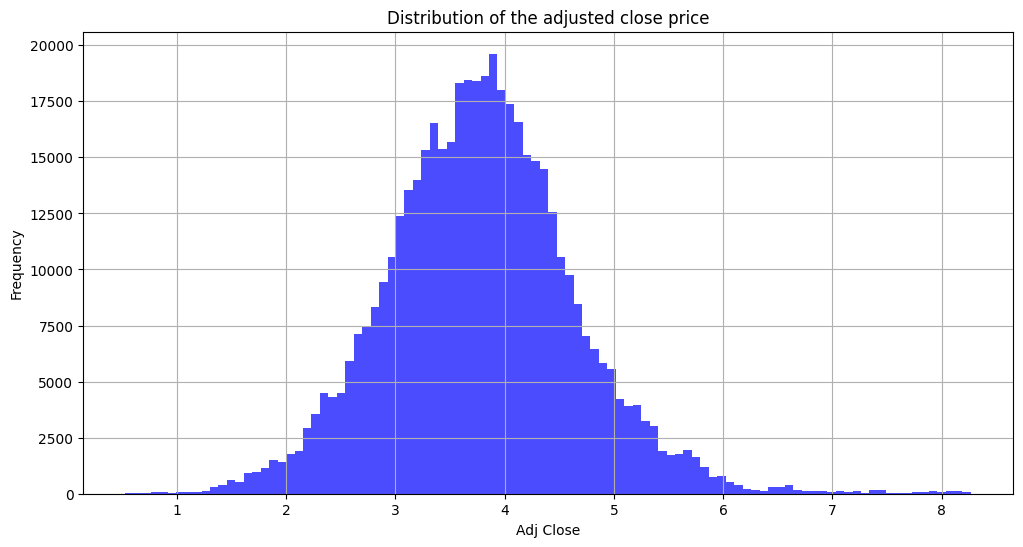

Mean of Adj Close: 68.55779880226886
Median of Adj Close: 42.509498596191406
Standard deviation of Adj Close: 145.55511948576088
Minimum value of Adj Close: 0.699999988079071
Maximum value of Adj Close: 3892.889892578125



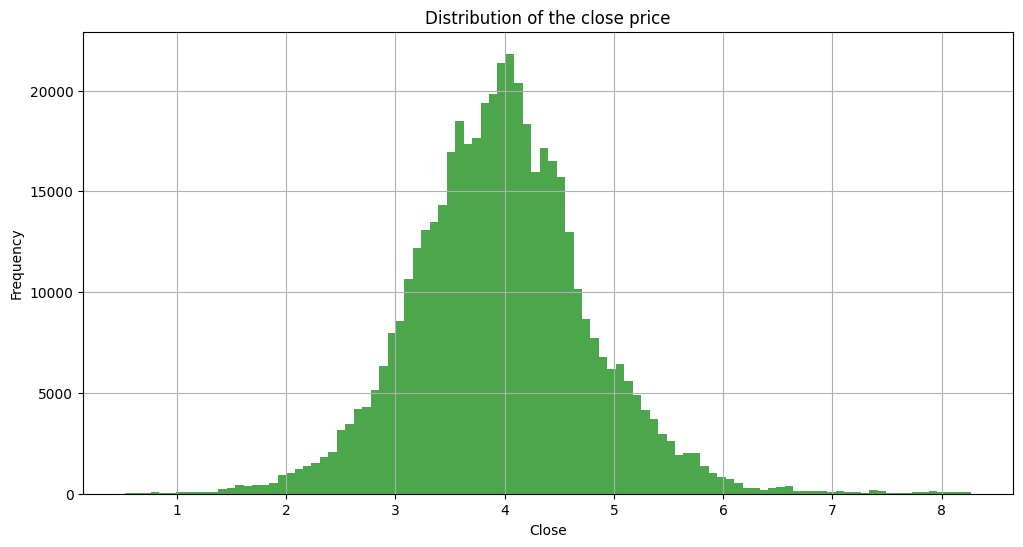

Mean of Close: 78.06377544553249
Median of Close: 51.540000915527344
Standard deviation of Close: 146.68483716390367
Minimum value of Close: 0.699999988079071
Maximum value of Close: 3892.889892578125



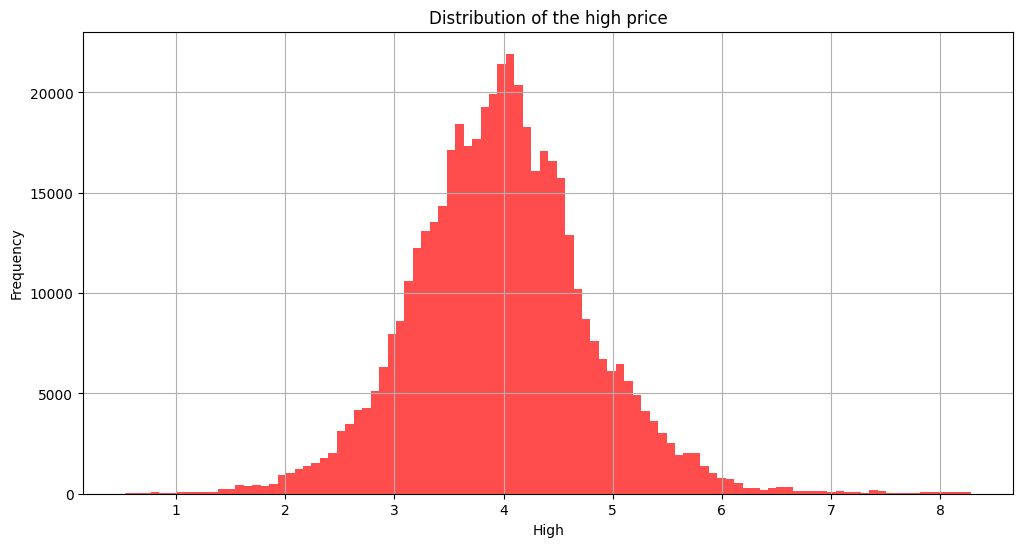

Mean of High: 78.80921669804621
Median of High: 52.04999923706055
Standard deviation of High: 148.32691683820715
Minimum value of High: 0.7099999785423279
Maximum value of High: 3946.5



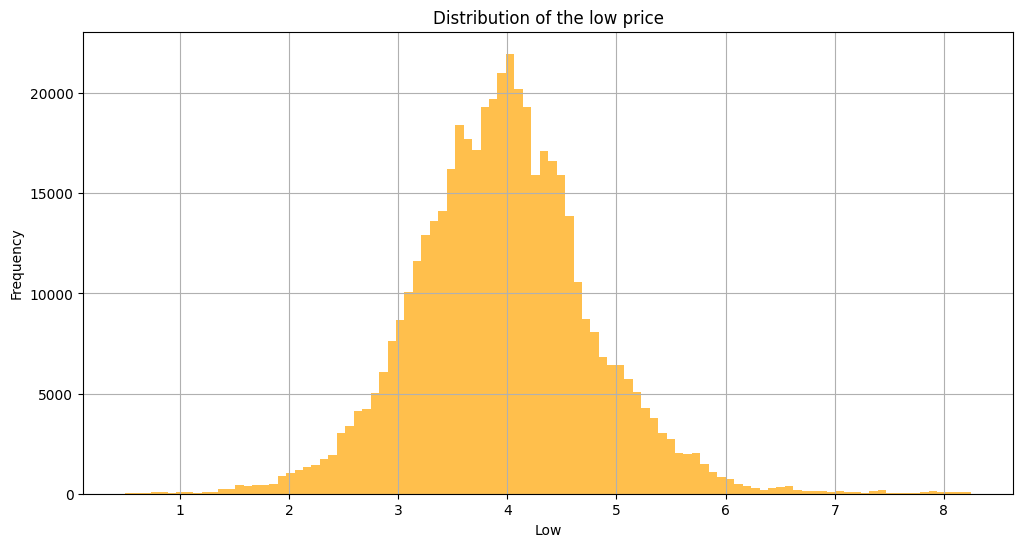

Mean of Low: 77.25728373165254
Median of Low: 51.0099983215332
Standard deviation of Low: 144.89809071840008
Minimum value of Low: 0.6499999761581421
Maximum value of Low: 3815.5



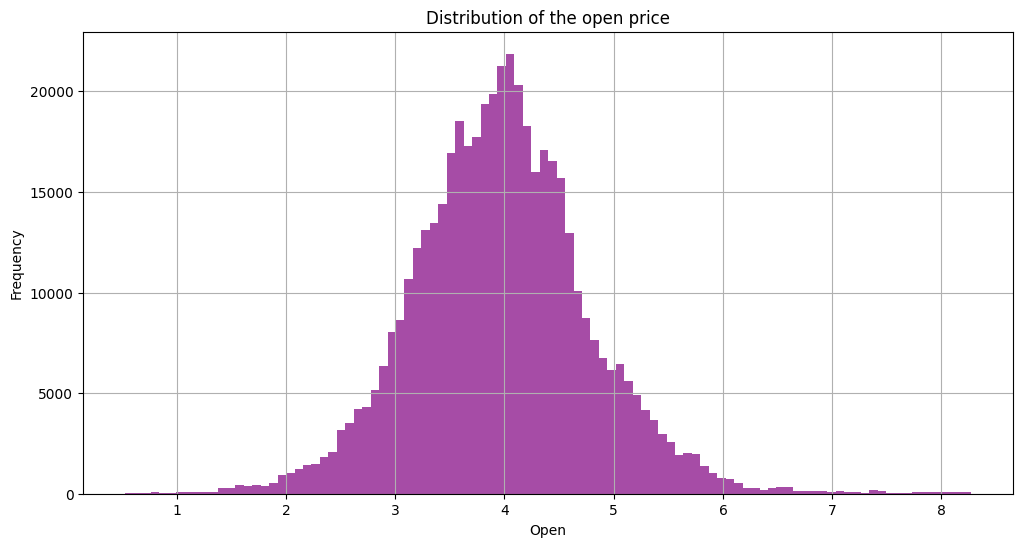

Mean of Open: 78.03879060271825
Median of Open: 51.52999877929688
Standard deviation of Open: 146.57531404161296
Minimum value of Open: 0.699999988079071
Maximum value of Open: 3900.0



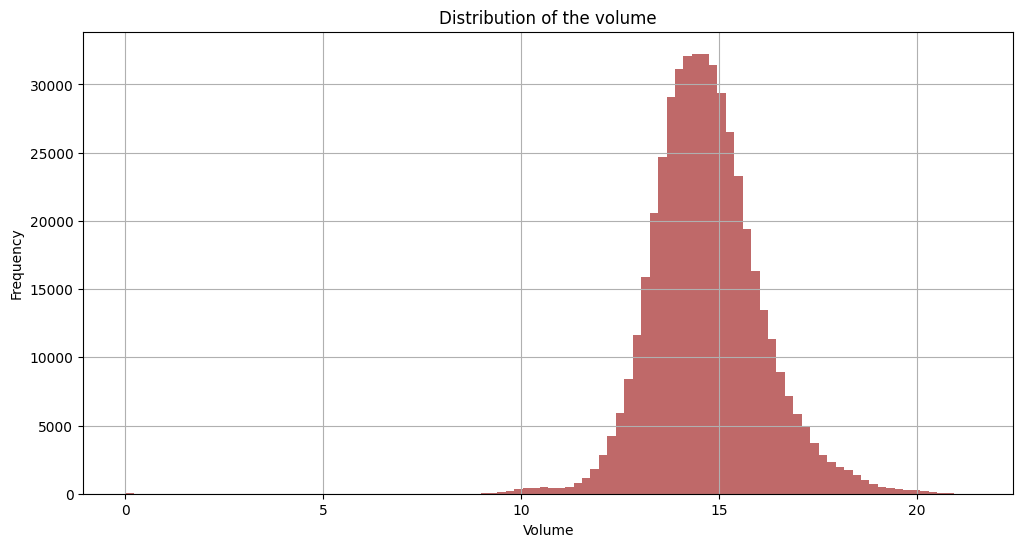

Mean of Volume: 7792912.815667765
Median of Volume: 2179400.0
Standard deviation of Volume: 32033581.72071989
Minimum value of Volume: 0.0
Maximum value of Volume: 1880998000.0



In [21]:
def plot_log_distribution(df, column, title, color):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.hist(np.log(df[column] + 1), bins=100, color=color, alpha=0.7)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print(f"Mean of {column}: {df[column].mean()}")
    print(f"Median of {column}: {df[column].median()}")
    print(f"Standard deviation of {column}: {df[column].std()}")
    print(f"Minimum value of {column}: {df[column].min()}")
    print(f"Maximum value of {column}: {df[column].max()}\n")

plot_log_distribution(train_df, 'Adj Close', 'Distribution of the adjusted close price', 'blue')
plot_log_distribution(train_df, 'Close', 'Distribution of the close price', 'green')
plot_log_distribution(train_df, 'High', 'Distribution of the high price', 'red')
plot_log_distribution(train_df, 'Low', 'Distribution of the low price', 'orange')
plot_log_distribution(train_df, 'Open', 'Distribution of the open price', 'purple')
plot_log_distribution(train_df, 'Volume', 'Distribution of the volume', 'brown')

Logartihmic transformation helped us with visualiazation of our right skewed data. We can now clearly see that there are no outliers in the datasets.

## Visualizations

In [22]:
full_df = pd.concat([train_df, test_df])
full_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
0,2010-01-04 00:00:00,MMM,53.295380,83.019997,83.449997,82.669998,83.089996,3043700.0,0.0,0
1,2010-01-05 00:00:00,MMM,52.961575,82.500000,83.230003,81.699997,82.800003,2847000.0,0.0,1
2,2010-01-06 00:00:00,MMM,53.712681,83.669998,84.599998,83.510002,83.879997,5268500.0,0.0,2
3,2010-01-07 00:00:00,MMM,53.751179,83.730003,83.760002,82.120003,83.320000,4470100.0,0.0,3
4,2010-01-08 00:00:00,MMM,54.129955,84.320000,84.320000,83.300003,83.690002,3405800.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...
209595,2024-02-26,ZTS,197.039993,197.039993,197.990005,195.460007,196.899994,2098500.0,NaN,209595
209596,2024-02-27,ZTS,199.000000,199.000000,199.250000,194.039993,197.649994,1982500.0,NaN,209596
209597,2024-02-28,ZTS,199.940002,199.940002,200.500000,197.100006,199.300003,2003300.0,NaN,209597
209598,2024-02-29,ZTS,198.330002,198.330002,200.529999,198.190002,200.500000,2849200.0,NaN,209598


In [23]:
full_df['Date'] = pd.to_datetime(full_df['Date'])

In [24]:
def plot_stock(df, stock):
    stock_df = df[df['Symbol'] == stock]
    stock_df = stock_df.set_index('Date')
    stock_df['Close'].plot(figsize=(12, 6))
    plt.title(f'Close price of {stock} stock')
    plt.show()

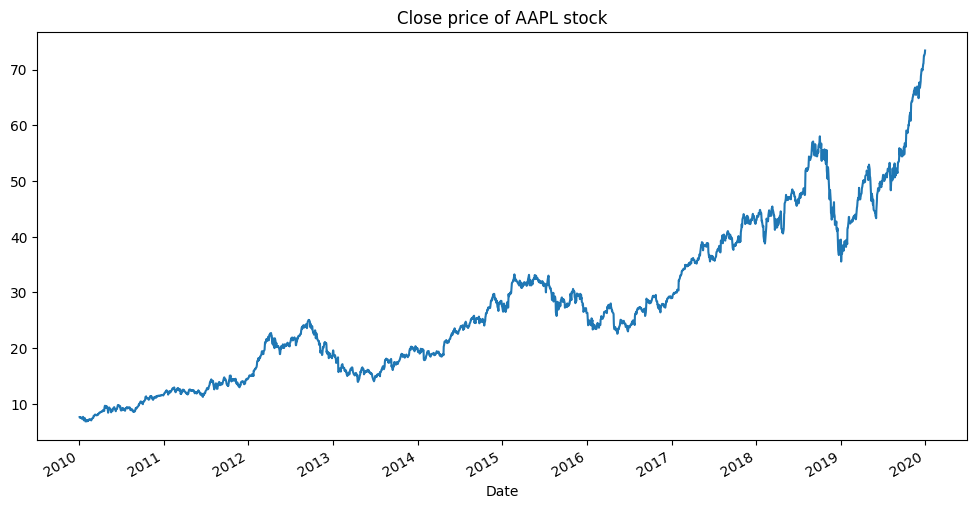

In [25]:
plot_stock(train_df, 'AAPL')

## What is the best stock to buy on 15.4.2017.? Why?


In order to answer this question, we will calculate gain and loss of every stock since 15th of April 2017 until 25th of April 2017.

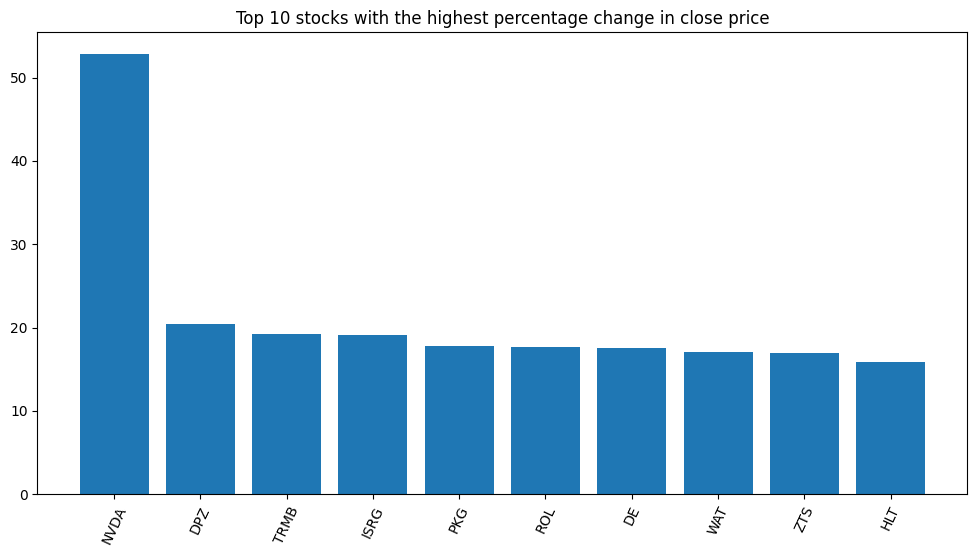

In [26]:
def calculate_percentage_change(df, column):
    start_date = '2017-04-17'
    start_date = pd.to_datetime(start_date)
    end_date = '2017-06-16'
    end_date = pd.to_datetime(end_date)
    grouped = df.groupby('Symbol')
    dict_pct = {}
    
    for symbol, group in grouped:
        if start_date not in group['Date'].values or end_date not in group['Date'].values:
            continue
        start_value = group.loc[group['Date'] == start_date, column].values[0]
        end_value = group.loc[group['Date'] == end_date, column].values[0]
        dict_pct[symbol] = (end_value - start_value) / start_value * 100
        
    return dict_pct

dict_pct = calculate_percentage_change(full_df, 'Close')

sorted_dict_pct = dict(sorted(dict_pct.items(), key=lambda item: item[1], reverse=True))
top_10 = dict(list(sorted_dict_pct.items())[:10])
plt.figure(figsize=(12, 6))
plt.bar(top_10.keys(), top_10.values())
plt.xticks(rotation=65)
plt.title('Top 10 stocks with the highest percentage change in close price')
plt.show()

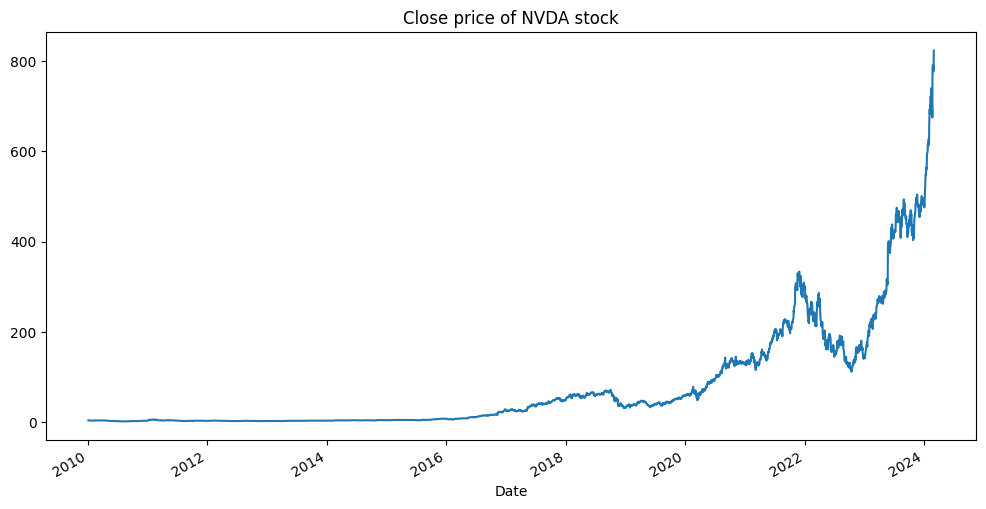

In [27]:
plot_stock(full_df, 'NVDA')

## Baseline model

In [28]:
train_y = train_df['Target']
train_X = train_df.drop(columns=['Date', 'Target', 'Symbol', 'Id'])

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(train_X, train_y)

test_X = test_df.drop(columns=['Date', 'Symbol', 'Id'])

predictions = rf_classifier.predict(test_X)

In [29]:
def write_submission(y_pred, test_df, filename):
    submission = pd.DataFrame({'Id': test_df['Id'], 'Target': y_pred})
    submission.to_csv(filename, index=False)

In [30]:
write_submission(predictions, test_df, 'submission.csv')

In [31]:
train_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
0,2010-01-04,MMM,53.295380,83.019997,83.449997,82.669998,83.089996,3043700.0,0,0
1,2010-01-05,MMM,52.961575,82.500000,83.230003,81.699997,82.800003,2847000.0,0,1
2,2010-01-06,MMM,53.712681,83.669998,84.599998,83.510002,83.879997,5268500.0,0,2
3,2010-01-07,MMM,53.751179,83.730003,83.760002,82.120003,83.320000,4470100.0,0,3
4,2010-01-08,MMM,54.129955,84.320000,84.320000,83.300003,83.690002,3405800.0,0,4
...,...,...,...,...,...,...,...,...,...,...
501395,2019-12-24,ZTS,131.227859,132.919998,133.080002,131.289993,132.210007,442500.0,1,501395
501396,2019-12-26,ZTS,131.336456,133.029999,133.190002,132.320007,133.190002,929400.0,1,501396
501397,2019-12-27,ZTS,131.553665,133.250000,133.479996,132.380005,133.399994,1296100.0,1,501397
501398,2019-12-30,ZTS,130.526886,132.210007,133.660004,131.809998,133.570007,942000.0,1,501398


In [32]:
# export the cleaned data
train_df.to_csv('../data/cleaned_train.csv', index=False)